<a href="https://colab.research.google.com/github/dvishal47/EDA-of-Video-Streaming-Platform/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Netflix dataframe has total 12 columns. All columns are of object datatype except column "release_year" which is of int64 datatype. But datatype of date_added column should be datetime stamp not in object format.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### **Convering column "date_added" datatype from object to Datetime data type.**

In [ ]:
df["date_added"]=pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Dataframe has total 12 columns and 8807 rows (index no. : 0 to 8806)**

In [ ]:
df.shape,df.index

((8807, 12), RangeIndex(start=0, stop=8807, step=1))

### **Dataframe has total 4307 null values. Out of which columns show_id, type,title, release_year,listed_in, description has no null values and column 'director' has maximum null value.**

In [ ]:
df.isnull().sum().sum(),df.isnull().sum()

(4307,
 show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64)

### **Percentage of null values per columns are as follows**

In [ ]:
round(100*(df.isnull().sum())/df.isnull().sum().sum(),2)

show_id          0.00
type             0.00
title            0.00
director        61.16
cast            19.15
country         19.29
date_added       0.23
release_year     0.00
rating           0.09
duration         0.07
listed_in        0.00
description      0.00
dtype: float64

### **Filling missing values in 'Cast' and 'director' Column**

In [ ]:
df['cast'].fillna('Unknown Cast',inplace=True)
df['director'].fillna('Unknown director',inplace=True)
df['country'].fillna('Unknown Country',inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Here we can observe that, rows with null values in 'duration' column. Values of duration column has been moved to 'rating' column.**

In [ ]:
df.loc[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### **Fill 'duration' column NAN values with rating values as found duration values were moved to rating column**

In [ ]:
df['duration']=df['duration'].fillna(df['rating'])
df['rating'] = df['rating'].replace(['74 min','84 min','66 min'],'Unknown Rating')
df.iloc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unknown Rating,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unknown Rating,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unknown Rating,66 min,Movies,The comic puts his trademark hilarious/thought...


### **Filled NAN values of 'rating' column with 'Unknown Rating'**

In [ ]:
df['rating']=df['rating'].fillna('Unknown Rating')

In [ ]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

### **Netflix has added more movies than TV shows on platform**

In [ ]:
df.groupby('type')[['type']].value_counts()

type
Movie      6131
TV Show    2676
dtype: int64

In [ ]:
df1=df

### **Unnesting of Cast, Director and Country Column**

In [ ]:
df1["Cast"]=df['cast'].str.split(",")
df1=df1.explode("Cast")
df1['Cast'] = df1['Cast'].apply(lambda x: x.strip())

In [ ]:
df1["Director"]=df1['director'].str.split(",")
df1=df1.explode("Director")
df1['Director'] = df1['Director'].apply(lambda x: x.strip())

In [ ]:
df1["Country"]=df1['country'].str.split(",")
df1=df1.explode("Country")
df1['Country'] = df1['Country'].apply(lambda x: x.strip())

In [ ]:
df1=df1.drop(['cast','director','country'],axis=1)
df1.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown Cast,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,Unknown director,South Africa
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,Unknown director,South Africa


### **Netflix has uploaded more movies than TV shows on their platform. Netflix has gradually increased in addtion of shows after 2000**

In [ ]:
pd.DataFrame(df1.groupby('type')['show_id'].nunique())

,show_id
type,
Movie,6131
TV Show,2676


### **Netflix has added prefer new movies(Movies released after 2005) rather than old movies**

(2005.0, 2025.7999999999997)

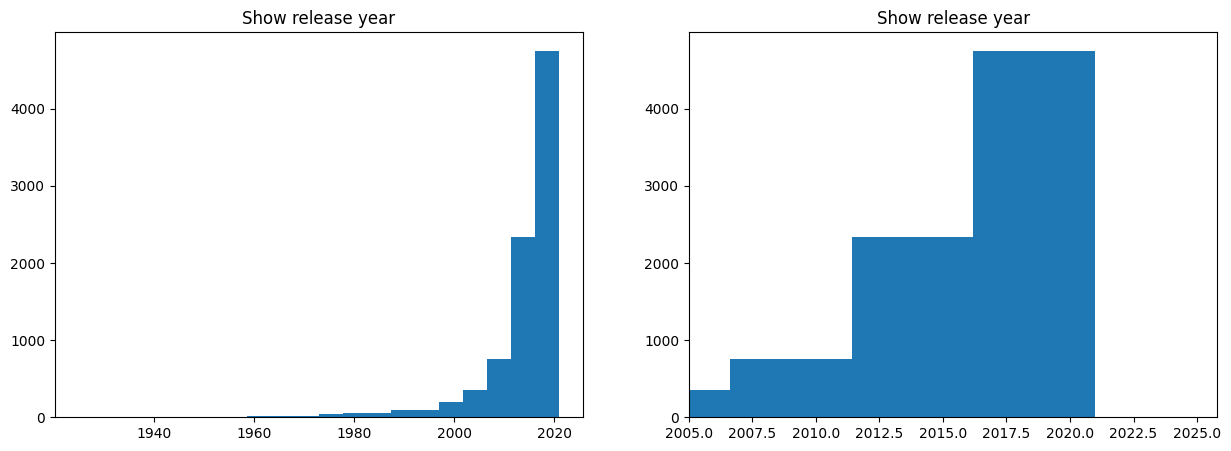

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Show release year")
plt.hist(df['release_year'],bins=20)

plt.subplot(1,2,2)
plt.title("Show release year")
plt.hist(df['release_year'],bins=20)
plt.xlim(left=2005)


### **Country-wise produced "Movies" which are uploaded on Netflix. United States has highest number of movies produced.**

In [ ]:
df_Country_movie=pd.DataFrame(df1.loc[df1['type']=='Movie'].groupby('Country')['show_id'].nunique().sort_values(ascending=False)[:10]).reset_index()
df_Country_movie=df_Country_movie.rename(columns={'show_id':"Number of Movies"})
df_Country_movie.head()

,Country,Number of Movies
0,United States,2752
1,India,962
2,United Kingdom,534
3,Unknown Country,440
4,Canada,319


### **Country-wise produced "TV Shows" which are uploaded on Netflix. United States has highest number of TV Shows produced.**

In [ ]:
df_Country_tvshow=pd.DataFrame(df1.loc[df1['type']=='TV Show'].groupby('Country')['show_id'].nunique().sort_values(ascending=False)[:10]).reset_index()
df_Country_tvshow=df_Country_tvshow.rename(columns={'show_id':"Number of TV Show"})
df_Country_tvshow.head()

,Country,Number of TV Show
0,United States,938
1,Unknown Country,391
2,United Kingdom,272
3,Japan,199
4,South Korea,170


Text(0.5, 1.0, 'TV Show produced by Country')

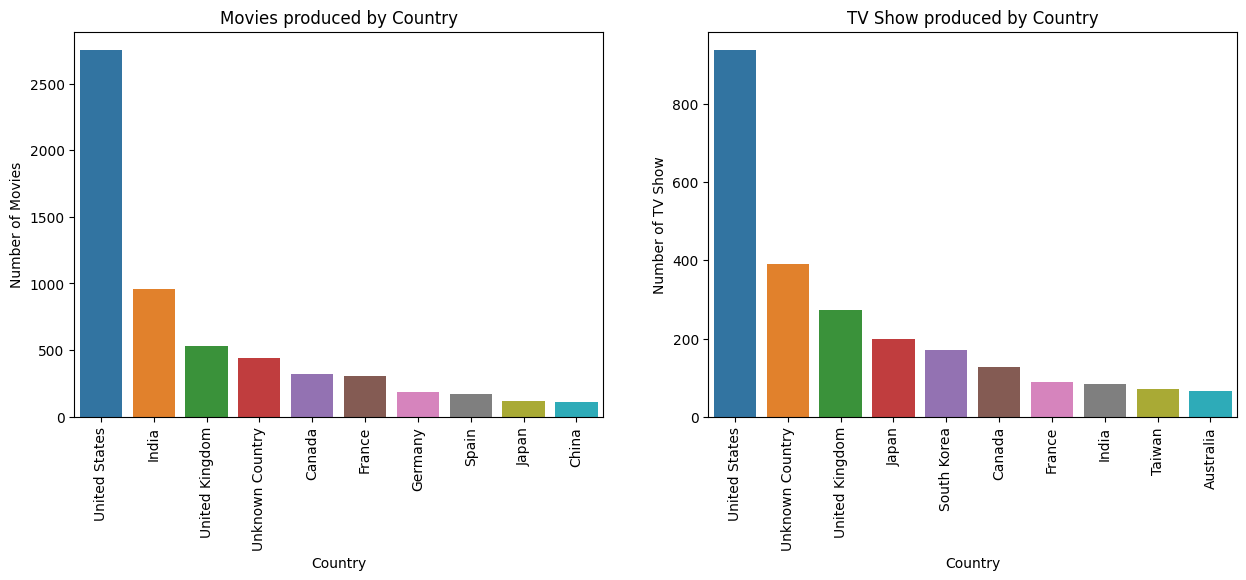

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=df_Country_movie['Country'],y=df_Country_movie['Number of Movies'],data=df_Country_movie)
plt.xticks(rotation=90)
plt.title("Movies produced by Country")

plt.subplot(1,2,2)
sns.barplot(x=df_Country_tvshow['Country'],y=df_Country_tvshow['Number of TV Show'],data=df_Country_tvshow)
plt.xticks(rotation=90)
plt.title("TV Show produced by Country")

### **Extract week number, month and year from 'date_added' column**

In [ ]:
df_duration=df1
df_duration.head()
df_duration['date_added_week']=df_duration['date_added'].dt.week
df_duration['date_added_month']=df_duration['date_added'].dt.month
df_duration['date_added_year']=df_duration['date_added'].dt.year
df_duration=df_duration.fillna(0)

<ipython-input-54-f34323acb9a3>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_duration['date_added_week']=df_duration['date_added'].dt.week


In [ ]:
df_duration['date_added_week']=df_duration['date_added_week'].astype('int')
df_duration['date_added_month']=df_duration['date_added_month'].astype('int')
df_duration['date_added_year']=df_duration['date_added_year'].astype('int')
df_duration.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Country,date_added_week,date_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown Cast,Kirsten Johnson,United States,38,9,2021
1,s2,TV Show,Blood & Water,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,38,9,2021
1,s2,TV Show,Blood & Water,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa,38,9,2021
1,s2,TV Show,Blood & Water,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,Unknown director,South Africa,38,9,2021
1,s2,TV Show,Blood & Water,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,Unknown director,South Africa,38,9,2021


### **Netflix has added more movies in the 1st week of the year followed by 44th and 40th week i.e in the month of November and October**

In [ ]:
df_mov_week=pd.DataFrame(df_duration.loc[df_duration['type']=='Movie'].groupby('date_added_week')['show_id'].nunique().sort_values(ascending=False)).reset_index()
df_mov_week=df_mov_week.rename(columns={"show_id":"Number of Movies"})
df_mov_week.head()

,date_added_week,Number of Movies
0,1,316
1,44,243
2,40,215
3,9,207
4,26,195


### **Netflix has added more TV Shows in the 27th week of the year i.e starting of July month and is followed by 31st and 13th week i.e in the month of August and last part of March**

In [ ]:
df_tv_week=pd.DataFrame(df_duration.loc[df_duration['type']=='TV Show'].groupby('date_added_week')['show_id'].nunique().sort_values(ascending=False)).reset_index()
df_tv_week=df_tv_week.drop(df_tv_week.loc[df_tv_week['date_added_week']==0].index)
df_tv_week=df_tv_week.rename(columns={"show_id":"Number of TV Shows"})
df_tv_week.head()

,date_added_week,Number of TV Shows
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75


Text(0.5, 1.0, 'TV Show produced per week of the year')

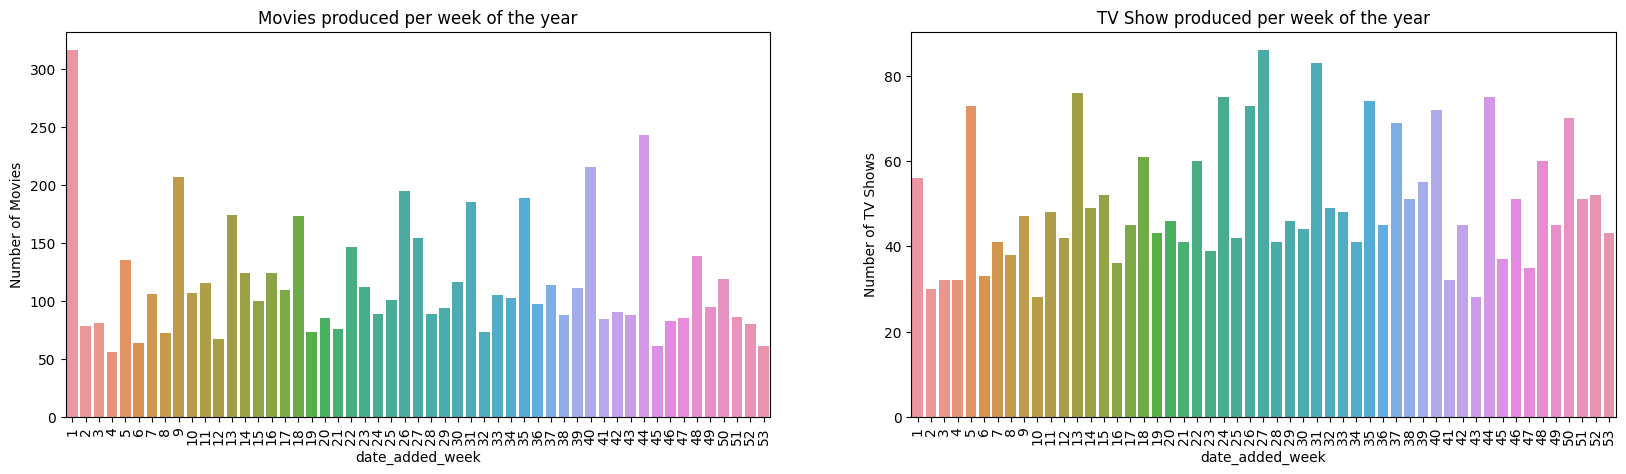

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=df_mov_week['date_added_week'],y=df_mov_week['Number of Movies'],data=df_mov_week)
plt.xticks(rotation=90)
plt.title("Movies produced per week of the year")

plt.subplot(1,2,2)
sns.barplot(x=df_tv_week['date_added_week'],y=df_tv_week['Number of TV Shows'],data=df_tv_week)
plt.xticks(rotation=90)
plt.title("TV Show produced per week of the year")

In [ ]:
df_mon_tv=pd.DataFrame(df_duration.loc[df_duration['type']=='TV Show'].groupby(['date_added_month'])['show_id'].nunique().sort_values(ascending=False)).reset_index()
df_mon_tv=df_mon_tv.drop(df_mon_tv.loc[df_mon_tv['date_added_month']==0].index)
df_mon_tv=df_mon_tv.rename(columns={'show_id':"Number of TV Shows"})
df_mon_tv.head()

,date_added_month,Number of TV Shows
0,12,266
1,7,262
2,9,251
3,6,236
4,8,236


In [ ]:
df_mon_movie=pd.DataFrame(df_duration.loc[df_duration['type']=='Movie'].groupby(['date_added_month'])['show_id'].nunique().sort_values(ascending=False)).reset_index()
df_mon_movie=df_mon_movie.rename(columns={'show_id':"Number of Movies"})
df_mon_movie.head()

,date_added_month,Number of Movies
0,7,565
1,4,550
2,12,547
3,1,546
4,10,545


### **Graph shows that movies and TV Shows were comparatively more added in second half ofthe year than first six months**

Text(0.5, 1.0, 'Movies added per month of the year')

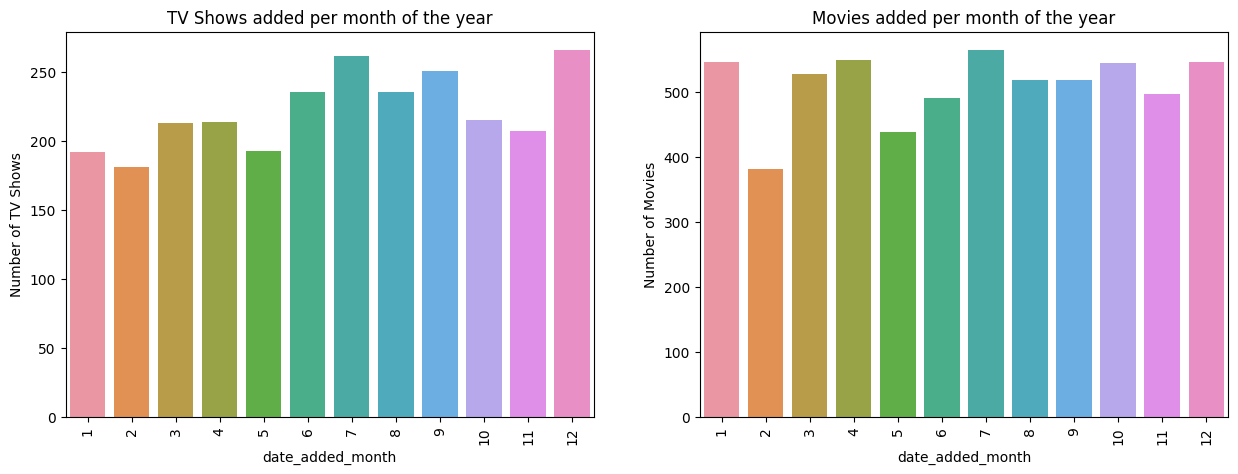

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=df_mon_tv['date_added_month'],y=df_mon_tv['Number of TV Shows'],data=df_mon_tv)
plt.xticks(rotation=90)
plt.title("TV Shows added per month of the year")

plt.subplot(1,2,2)
sns.barplot(x=df_mon_movie['date_added_month'],y=df_mon_movie['Number of Movies'],data=df_mon_movie)
plt.xticks(rotation=90)
plt.title("Movies added per month of the year")

### **Netflix added more movies as the year progress.Netflix added more movies in recent 9 to 10 years.Highest number of movies were added in the year of 2018 and 2017**

In [ ]:
pd.DataFrame(df.loc[df['type']=="Movie"].groupby('release_year')['show_id'].nunique().sort_values(ascending=False)).reset_index()[:10]


,release_year,show_id
0,2018,767
1,2017,767
2,2016,658
3,2019,633
4,2020,517
5,2015,398
6,2021,277
7,2014,264
8,2013,225
9,2012,173


### **Netflix added more TV Shows as the year progress.Netflix added more TV Shows in recent 5 to 6 years.Highest number of TV Shows were added in the year of 2020 and 2019.There is linear increase in TV show addition from year 2015. It shows that Netflix has more focus on TV Shows in recent years**

In [ ]:
pd.DataFrame(df.loc[df['type']=="TV Show"].groupby('release_year')['show_id'].nunique().sort_values(ascending=False)).reset_index()[:10]

,release_year,show_id
0,2020,436
1,2019,397
2,2018,380
3,2021,315
4,2017,265
5,2016,244
6,2015,162
7,2014,88
8,2012,64
9,2013,63


In [ ]:
pd.DataFrame(df_duration.loc[df_duration['type']=='TV Show'].groupby(['date_added_month','date_added_year'])['show_id'].nunique().sort_values(ascending=False)[:10])

,,show_id
date_added_month,date_added_year,
7,2021,88
6,2021,83
12,2020,68
11,2019,68
10,2019,65
9,2021,65
8,2021,61
12,2018,61
7,2019,59


### **Graph shows that as year progress, netflix added more Movie and TV Shows. But Netflix focus has shifted more towards TV shows from Movies from 2017 as the difference between number of movie and number of TV shows reduced from year 2017 to 2021**

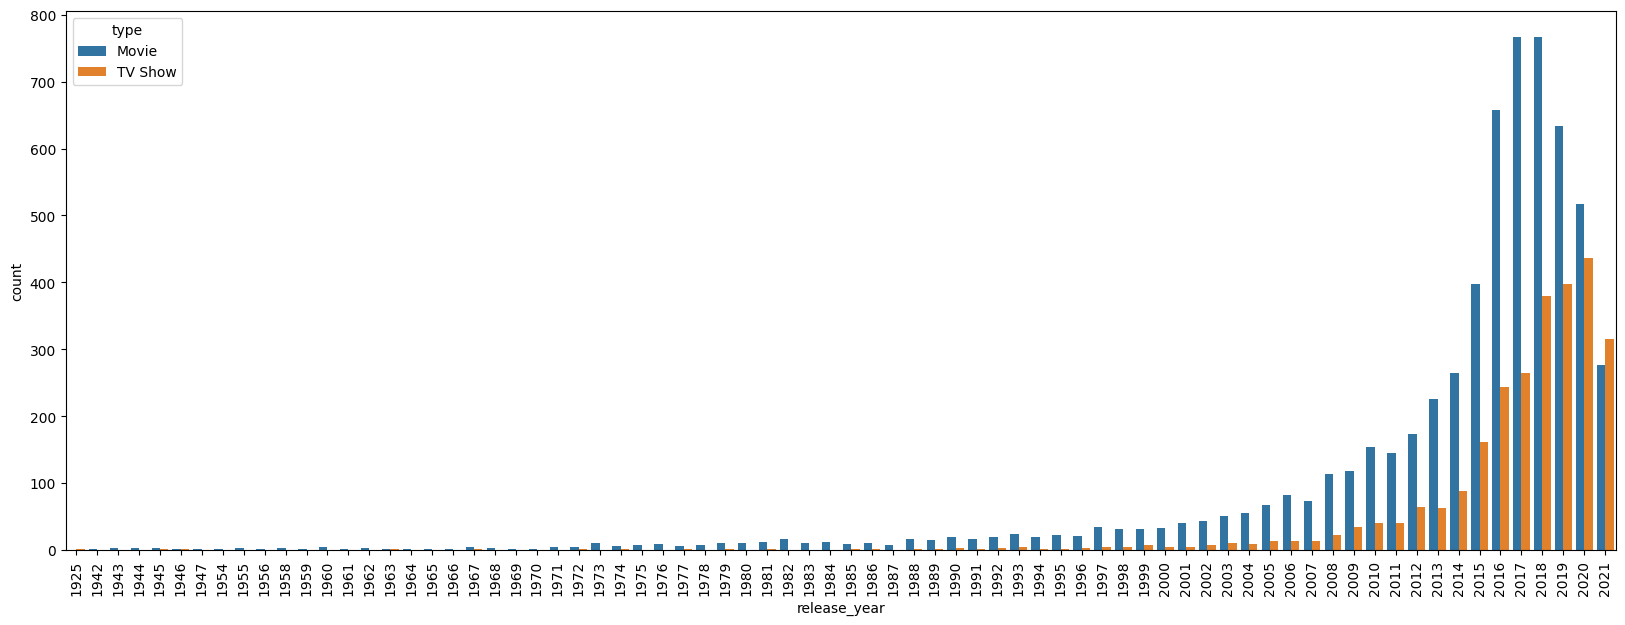

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x=df['release_year'],hue='type')
plt.show()

### **In Movies, "Anupam Kher" is the popular Cast with maximum number of movies (42) and is followed by "Shah Rukh Khan" with 35 movies**

In [ ]:
df_cast_movie=pd.DataFrame(df1.loc[df1['type']=='Movie'].groupby('Cast')['show_id'].nunique()).reset_index()
df_cast_movie=df_cast_movie.drop(df_cast_movie.loc[df_cast_movie['Cast']=='Unknown Cast'].index)
df_cast_movie=df_cast_movie.rename(columns={'show_id':"Number of Movies"})
df_cast_movie.sort_values('Number of Movies',ascending=False)[:10]

,Cast,Number of Movies
2104,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
637,Akshay Kumar,30
18064,Om Puri,30
12031,Julie Tejwani,28
18329,Paresh Rawal,28
1312,Amitabh Bachchan,28
20692,Rupa Bhimani,27
3353,Boman Irani,27


### **In TV shows, "Takahiro Sakurai" is the popular Cast with maximum number of TV Shows (25) and is followed by "Yuki Kaji" with 19 TV Shows**

In [ ]:
df_cast_tv=pd.DataFrame(df1.loc[df1['type']=='TV Show'].groupby('Cast')['show_id'].nunique()).reset_index()
df_cast_tv=df_cast_tv.drop(df_cast_tv.loc[df_cast_tv['Cast']=='Unknown Cast'].index)
df_cast_tv=df_cast_tv.rename(columns={'show_id':"Number of TV Shows"})
df_cast_tv.sort_values('Number of TV Shows',ascending=False)[:10]

,Cast,Number of TV Shows
13230,Takahiro Sakurai,25
14581,Yuki Kaji,19
2873,Daisuke Ono,17
251,Ai Kayano,17
6804,Junichi Suwabe,17
14565,Yuichi Nakamura,16
6761,Jun Fukuyama,15
14497,Yoshimasa Hosoya,15
3126,David Attenborough,14
13245,Takehito Koyasu,13


### **In Movie,"Rajiv Chilaka" is the popular director with 22 movies and is followed by "Jan Suter" with 21 movies**

In [ ]:
df_dir_movie=pd.DataFrame(df1.loc[df1['type']=='Movie'].groupby('Director')['show_id'].nunique()).reset_index()
df_dir_movie=df_dir_movie.drop(df_dir_movie.loc[df_dir_movie['Director']=='Unknown director'].index)
df_dir_movie=df_dir_movie.rename(columns={'show_id':"Number of Movies"})
df_dir_movie.sort_values('Number of Movies',ascending=False)[:10]

,Director,Number of Movies
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
1859,Jay Chapman,12
2815,Martin Scorsese,12
4726,Youssef Chahine,12


### **In TV Show,"Ken Burns" and "Alastair Fothergill" is the popular director with 3 TV Shows each**

In [ ]:
df_dir_tv=pd.DataFrame(df1.loc[df1['type']=='TV Show'].groupby('Director')['show_id'].nunique()).reset_index()
df_dir_tv=df_dir_tv.drop(df_dir_tv.loc[df_dir_tv['Director']=='Unknown director'].index)
df_dir_tv=df_dir_tv.rename(columns={'show_id':"Number of TV Shows"})
df_dir_tv.sort_values('Number of TV Shows',ascending=False)[:10]

,Director,Number of TV Shows
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
140,Jung-ah Im,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
168,Lynn Novick,2
103,Iginio Straffi,2
251,Shin Won-ho,2


### **In Movies, "Rajesh Chilaka - Rajesh Kava" and "Rajesh Chilaka - Julie Tejwani" are the popular pairs of Director-Cast as they featured in total 19 movies each. This both pair featured in "Children & Family Movies" genre movies especially with "Chota Bheem" and it parts**

In [ ]:
df3=df1.drop(df1.loc[df1['Director']=='Unknown director'].index)
df3=df3.drop(df3.loc[df3['Cast']=='Unknown Cast'].index)
pd.DataFrame(df3.groupby(['Cast','Director'])['show_id'].nunique().sort_values(ascending=False)[:10]).reset_index()

,Cast,Director,show_id
0,Rajesh Kava,Rajiv Chilaka,19
1,Julie Tejwani,Rajiv Chilaka,19
2,Jigna Bhardwaj,Rajiv Chilaka,18
3,Rupa Bhimani,Rajiv Chilaka,18
4,Vatsal Dubey,Rajiv Chilaka,16
5,Swapnil,Rajiv Chilaka,13
6,Mousam,Rajiv Chilaka,13
7,Saurav Chakraborty,Suhas Kadav,8
8,Satsuki Yukino,Toshiya Shinohara,7
9,Yılmaz Erdoğan,Yılmaz Erdoğan,7


In [ ]:
df3.groupby(['Cast','Director']).get_group(("Jigna Bhardwaj","Rajiv Chilaka"))[:5]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Country,date_added_week,date_added_month,date_added_year
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...,Jigna Bhardwaj,Rajiv Chilaka,Unknown Country,29.0,7.0,2021.0
407,s408,Movie,Chhota Bheem & Ganesh,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...,Jigna Bhardwaj,Rajiv Chilaka,Unknown Country,29.0,7.0,2021.0
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...,Jigna Bhardwaj,Rajiv Chilaka,Unknown Country,29.0,7.0,2021.0
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,2021-07-22,2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...,Jigna Bhardwaj,Rajiv Chilaka,Unknown Country,29.0,7.0,2021.0
410,s411,Movie,Chhota Bheem And The Broken Amulet,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...,Jigna Bhardwaj,Rajiv Chilaka,India,29.0,7.0,2021.0


In [ ]:
df.head()
df_dur_type=df1
df_dur_type[["durataion_time","duration_unit"]]=df_dur_type['duration'].str.split(" ",expand=True)

### **TV show has average of approx 2 season and Movie has average of 104 minutes**

In [ ]:
df_dur_type['durataion_time']=df_dur_type['durataion_time'].astype('int')
df_dur_type.groupby('type')['durataion_time'].agg(['min','max','mean'])

,min,max,mean
type,,,
Movie,3,312,104.486058
TV Show,1,17,1.972666


### **Unnesting of "listed_in" column**

In [ ]:
df_genre=df1
df_genre['listed_in']=df_genre['listed_in'].str.split(",")
df_genre=df_genre.explode('listed_in')
df_genre['listed_in'] = df_genre['listed_in'].apply(lambda x: x.strip())
df_genre.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Country,date_added_week,date_added_month,date_added_year,durataion_time,duration_unit
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown Cast,Kirsten Johnson,United States,38.0,9.0,2021.0,90,min
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,38.0,9.0,2021.0,2,Seasons
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,38.0,9.0,2021.0,2,Seasons
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,38.0,9.0,2021.0,2,Seasons
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa,38.0,9.0,2021.0,2,Seasons


### **On Netflix platform, Genre of "International Movies" was the highest and followed by "Dramas" genre in "Movie" type**

In [ ]:
pd.DataFrame(df_genre.loc[df_genre['type']=="Movie"].groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False)[:10].reset_index())

,listed_in,show_id
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


### **On Netflix platform, Genre of "International TV Shows" was the highest and followed by "TV Dramas" genre in "TV Shows" type**

In [ ]:
pd.DataFrame(df_genre.loc[df_genre['type']=="TV Show"].groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False)[:10].reset_index())

,listed_in,show_id
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


### **In Movies, genre "International Movies" produced in India is highest.In TV Shows, genre "TV Comedies" produced in United States is highest.**

In [ ]:
pd.DataFrame(df_genre.groupby(['listed_in','Country','type'])['show_id'].nunique().sort_values(ascending=False)[:20].reset_index())

,listed_in,Country,type,show_id
0,International Movies,India,Movie,864
1,Dramas,United States,Movie,835
2,Comedies,United States,Movie,680
3,Dramas,India,Movie,662
4,Documentaries,United States,Movie,512
5,Action & Adventure,United States,Movie,404
6,Independent Movies,United States,Movie,390
7,Children & Family Movies,United States,Movie,390
8,Comedies,India,Movie,323
9,Thrillers,United States,Movie,292


### **In movie, "Anupam Kher" has done most genre "International Movies" i.e 38 movies.In TV Shows, "Takahiro Sakurair" has done most genre "Anime Series" i.e 24 TV Shows.**

In [ ]:
df_genre.drop(df_genre.loc[df_genre['Cast']=="Unknown Cast"].index).groupby(['listed_in','Cast','type'])['show_id'].nunique().sort_values(ascending=False)[:20].reset_index()

,listed_in,Cast,type,show_id
0,International Movies,Anupam Kher,Movie,38
1,International Movies,Shah Rukh Khan,Movie,32
2,Dramas,Naseeruddin Shah,Movie,28
3,Dramas,Shah Rukh Khan,Movie,28
4,Dramas,Anupam Kher,Movie,28
5,International Movies,Naseeruddin Shah,Movie,27
6,International Movies,Om Puri,Movie,27
7,International Movies,Akshay Kumar,Movie,27
8,Children & Family Movies,Julie Tejwani,Movie,26
9,International Movies,Paresh Rawal,Movie,25


### **In Movie," Rajiv Chilaka" has directed more number of single genre("Children & Family Movies")**

In [ ]:
df_genre.drop(df_genre.loc[df_genre['Director']=="Unknown director"].index).groupby(['listed_in','Director','type'])['show_id'].nunique().sort_values(ascending=False)[:20].reset_index()

,listed_in,Director,type,show_id
0,Children & Family Movies,Rajiv Chilaka,Movie,22
1,Stand-Up Comedy,Jan Suter,Movie,21
2,Stand-Up Comedy,Raúl Campos,Movie,19
3,Children & Family Movies,Suhas Kadav,Movie,16
4,Stand-Up Comedy,Marcus Raboy,Movie,15
5,Stand-Up Comedy,Jay Karas,Movie,14
6,International Movies,Cathy Garcia-Molina,Movie,13
7,Stand-Up Comedy,Jay Chapman,Movie,12
8,Dramas,Youssef Chahine,Movie,12
9,International Movies,Youssef Chahine,Movie,10


### **"Pioneers: First Women Filmmakers" TV Show took maximum (93 years) to added on Netflix platform. While in movie, "Prelude to War" took maximum (75 years) to added on Netflix platfrom**

In [ ]:
df_date_diff=df1
df_date_diff["Diff"]=df_date_diff["date_added_year"]-df_date_diff["release_year"]
df_date_diff.sort_values('Diff',ascending=False).head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Country,date_added_week,date_added_month,date_added_year,durataion_time,duration_unit,Diff
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,2018-12-30,1925,TV-14,1 Season,[TV Shows],This collection restores films from women who ...,Unknown Cast,Unknown director,Unknown Country,52.0,12.0,2018.0,1,Season,93.0
1331,s1332,TV Show,Five Came Back: The Reference Films,2021-02-09,1945,TV-MA,1 Season,[TV Shows],This collection includes 12 World War II-era p...,Unknown Cast,Unknown director,United States,6.0,2.0,2021.0,1,Season,76.0
7790,s7791,Movie,Prelude to War,2017-03-31,1942,TV-14,52 min,"[Classic Movies, Documentaries]",Frank Capra's documentary chronicles the rise ...,Unknown Cast,Frank Capra,United States,13.0,3.0,2017.0,52,min,75.0
8205,s8206,Movie,The Battle of Midway,2017-03-31,1942,TV-14,18 min,"[Classic Movies, Documentaries]",Director John Ford captures combat footage of ...,Henry Fonda,John Ford,United States,13.0,3.0,2017.0,18,min,75.0
8205,s8206,Movie,The Battle of Midway,2017-03-31,1942,TV-14,18 min,"[Classic Movies, Documentaries]",Director John Ford captures combat footage of ...,Jane Darwell,John Ford,United States,13.0,3.0,2017.0,18,min,75.0


Text(0.5, 1.0, 'Release year (from 2010)')

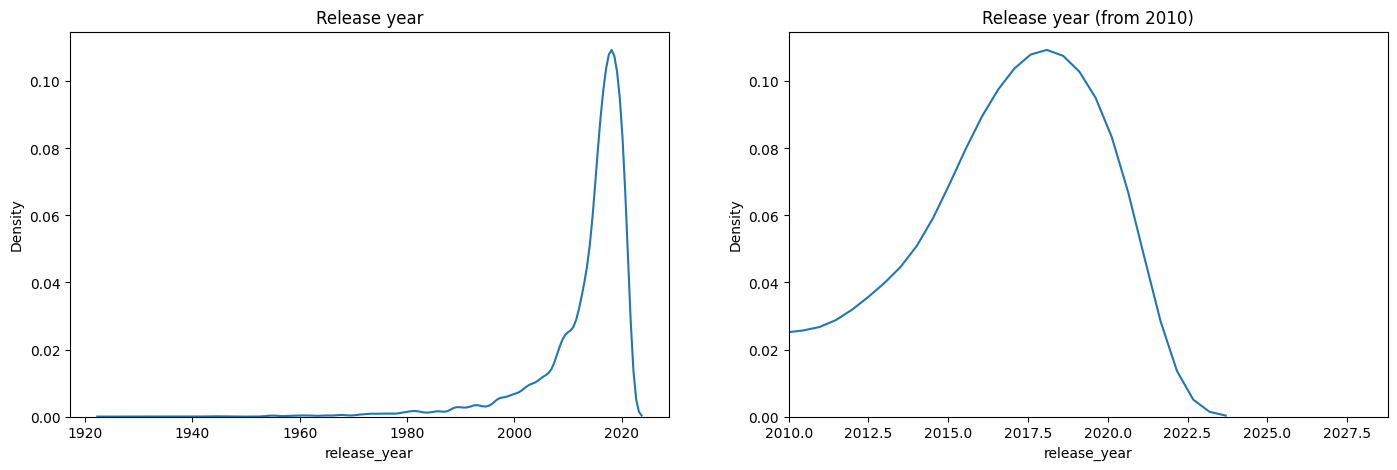

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
sns.kdeplot(df_date_diff['release_year'])
plt.title("Release year")

plt.subplot(1,2,2)
sns.kdeplot(df_date_diff['release_year'])
plt.xlim(left=2010)
plt.title("Release year (from 2010)")

### **As the year progress, addition of shows increased rapidly especially in last 20 years**

In [ ]:
A=[1925,1955,1985,2005,2021]
B=['1925-1955','1955-1985','1985-2005','2005-2021']
df_date_diff['release_year_range']=pd.cut(df['release_year'],bins=A,labels=B)
df_date_diff.groupby('release_year_range')['show_id'].nunique()

release_year_range
1925-1955      20
1955-1985     175
1985-2005     667
2005-2021    7944
Name: show_id, dtype: int64

<Axes: xlabel='release_year_range', ylabel='count'>

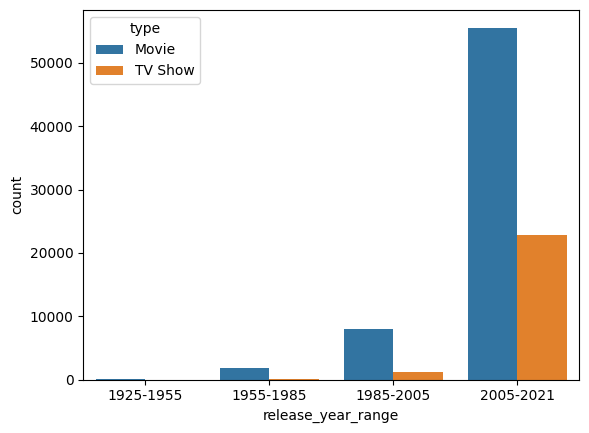

In [ ]:
sns.countplot(x=df_date_diff['release_year_range'],data=df_date_diff,hue='type')

In [ ]:
df_date_diff.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Country,date_added_week,date_added_month,date_added_year,durataion_time,duration_unit,Diff,release_year_range
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",Unknown Cast,Kirsten Johnson,United States,38.0,9.0,2021.0,90,min,1.0,2005-2021
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,38.0,9.0,2021.0,2,Seasons,0.0,2005-2021
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa,38.0,9.0,2021.0,2,Seasons,0.0,2005-2021
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",Gail Mabalane,Unknown director,South Africa,38.0,9.0,2021.0,2,Seasons,0.0,2005-2021
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",Thabang Molaba,Unknown director,South Africa,38.0,9.0,2021.0,2,Seasons,0.0,2005-2021


### **Duration time for Movie. Average Duration of movies is 104 minutes**

In [ ]:
pd.DataFrame(df_date_diff.loc[df_date_diff['type']=="Movie"]['durataion_time'].agg(['min','max','mean'])).reset_index()

,index,durataion_time
0,min,3.000000
1,max,312.000000
2,mean,104.486058


### **Duration for TV Shows. Average duartion of TV Show is 2 season**

In [ ]:
pd.DataFrame(df_date_diff.loc[df_date_diff['type']=="TV Show"]['durataion_time'].agg(['min','max','mean'])).reset_index()

,index,durataion_time
0,min,1.000000
1,max,17.000000
2,mean,1.972666


Text(0, 0.5, 'durataion_time (in Season)')

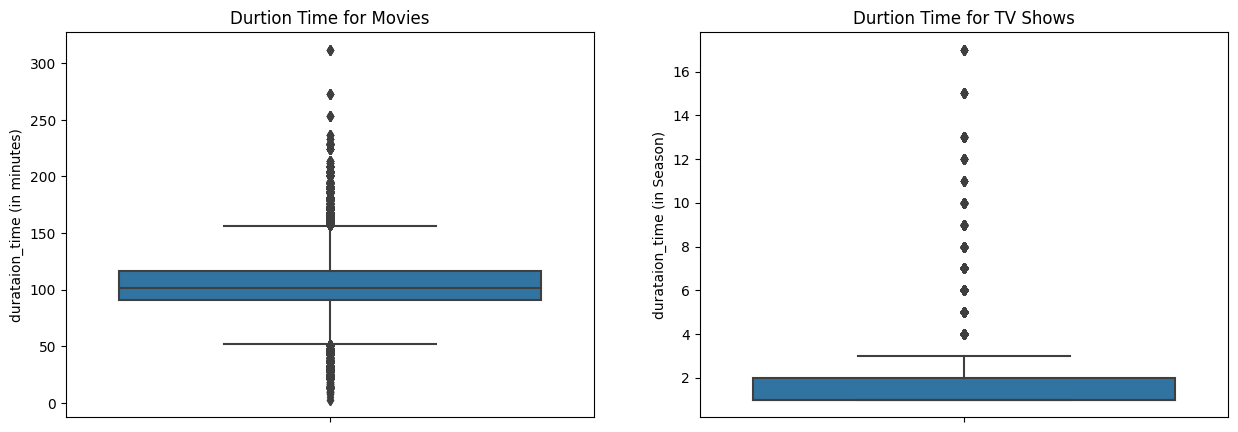

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Durtion Time for Movies")
sns.boxplot(y=(df_date_diff.loc[df_date_diff['type']=='Movie'])['durataion_time'])
plt.ylabel('durataion_time (in minutes)')


plt.subplot(1,2,2)
plt.title("Durtion Time for TV Shows")
sns.boxplot(y=(df_date_diff.loc[df_date_diff['type']=='TV Show'])['durataion_time'])
plt.ylabel('durataion_time (in Season)')

### **Netflix adds movie on platform after 6 years on an average**

In [ ]:
df_date_diff.loc[df_date_diff['type']=="Movie"]['Diff'].agg(['min','max','mean'])

min     -1.000000
max     75.000000
mean     6.638814
Name: Diff, dtype: float64

### **Netflix adds TV Shows on platform after 2.5 years on an average**

In [ ]:
df_date_diff.loc[df_date_diff['type']=="TV Show"]['Diff'].agg(['min','max','mean'])

min     -3.000000
max     93.000000
mean     2.427838
Name: Diff, dtype: float64

### **Here release_year is greater than "date_added" which is not possible. Netflix should focus on this to focsus on precise data Analysis.**

In [ ]:
df_date_diff.loc[(df_date_diff['type']=="TV Show")&(df_date_diff['Diff']==-3)].head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Country,date_added_week,date_added_month,date_added_year,durataion_time,duration_unit,Diff,release_year_range
7112,s7113,TV Show,Jack Taylor,2013-03-31,2016,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",Ken Bruen's bestselling crime novels leap to l...,Iain Glen,Stuart Orme,United States,13.0,3.0,2013.0,1,Season,-3.0,2005-2021
7112,s7113,TV Show,Jack Taylor,2013-03-31,2016,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",Ken Bruen's bestselling crime novels leap to l...,Iain Glen,Stuart Orme,Ireland,13.0,3.0,2013.0,1,Season,-3.0,2005-2021
7112,s7113,TV Show,Jack Taylor,2013-03-31,2016,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",Ken Bruen's bestselling crime novels leap to l...,Killian Scott,Stuart Orme,United States,13.0,3.0,2013.0,1,Season,-3.0,2005-2021
7112,s7113,TV Show,Jack Taylor,2013-03-31,2016,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",Ken Bruen's bestselling crime novels leap to l...,Killian Scott,Stuart Orme,Ireland,13.0,3.0,2013.0,1,Season,-3.0,2005-2021
7112,s7113,TV Show,Jack Taylor,2013-03-31,2016,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",Ken Bruen's bestselling crime novels leap to l...,Nora-Jane Noone,Stuart Orme,United States,13.0,3.0,2013.0,1,Season,-3.0,2005-2021


### **Here release_year is greater than "date_added" which is not possible. Netflix should focus on this to focsus on precise data Analysis.**

In [ ]:
df_date_diff.loc[(df_date_diff['type']=="Movie")&(df_date_diff['Diff']==-1)].head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Cast,Director,Country,date_added_week,date_added_month,date_added_year,durataion_time,duration_unit,Diff,release_year_range
5394,s5395,Movie,Hans Teeuwen: Real Rancour,2017-07-01,2018,TV-MA,86 min,[Stand-Up Comedy],Comedian Hans Teeuwen rebels against political...,Hans Teeuwen,Doesjka van Hoogdalem,Netherlands,26.0,7.0,2017.0,86,min,-1.0,2005-2021
7063,s7064,Movie,Incoming,2018-10-26,2019,TV-MA,89 min,"[Action & Adventure, Sci-Fi & Fantasy]",When an imprisoned terrorist cell hijacks a hi...,Scott Adkins,Eric Zaragosa,Serbia,43.0,10.0,2018.0,89,min,-1.0,2005-2021
7063,s7064,Movie,Incoming,2018-10-26,2019,TV-MA,89 min,"[Action & Adventure, Sci-Fi & Fantasy]",When an imprisoned terrorist cell hijacks a hi...,Scott Adkins,Eric Zaragosa,United States,43.0,10.0,2018.0,89,min,-1.0,2005-2021
7063,s7064,Movie,Incoming,2018-10-26,2019,TV-MA,89 min,"[Action & Adventure, Sci-Fi & Fantasy]",When an imprisoned terrorist cell hijacks a hi...,Aaron McCusker,Eric Zaragosa,Serbia,43.0,10.0,2018.0,89,min,-1.0,2005-2021
7063,s7064,Movie,Incoming,2018-10-26,2019,TV-MA,89 min,"[Action & Adventure, Sci-Fi & Fantasy]",When an imprisoned terrorist cell hijacks a hi...,Aaron McCusker,Eric Zaragosa,United States,43.0,10.0,2018.0,89,min,-1.0,2005-2021


### **For new movies(movies released after 2005), TV-MA was the highest number of rating for both Movie and TV shows.For old movies(movies released before 2005), R was the highest number of rating for Movie and TV-14 was the highest rating for TV shows.**

In [ ]:
df.loc[(df['release_year']>=2005)&(df['type']=="Movie")]['rating'].value_counts().reset_index()[:5]

,index,rating
0,TV-MA,1980
1,TV-14,1266
2,R,629
3,TV-PG,481
4,PG-13,372


In [ ]:
df.loc[(df['release_year']>2005)&(df['type']=="TV Show")]['rating'].value_counts().reset_index()[:5]

,index,rating
0,TV-MA,1131
1,TV-14,700
2,TV-PG,305
3,TV-Y7,176
4,TV-Y,173


In [ ]:
df.loc[(df['release_year']<2005)&(df['type']=="Movie")]['rating'].value_counts().reset_index()[:5]

,index,rating
0,R,168
1,TV-14,161
2,PG-13,118
3,TV-MA,82
4,PG,73


In [ ]:
df.loc[(df['release_year']<2005)&(df['type']=="TV Show")]['rating'].value_counts().reset_index()[:5]

,index,rating
0,TV-14,28
1,TV-PG,17
2,TV-Y7,16
3,TV-MA,10
4,TV-G,9


**INSIGHTS :**
1. Netflix has more number of movies than TV shows.
2. Netflix adds more new shows (Shows released after 2005) than old shows (Shows released before 2005)
3. Netflix uploaded highest number of movies and TV Shows produced from United States.
4. Netflix uploaded highest number of movies and TV Shows in 1st week and 27th week respctively.
5. Netflix uploads more movies and TV shows in second half of the year and t has gradually increased in the last 9 to 10 years.
6. In movies, "Anupam Kher" is the popular Cast, "Rajiv Chilaka" is the popular director as he has directed most movies and also single genre '"Children & Family Movies"
7. In TV shows, "Takahiro Sakurai" is the popular Cast, "Ken Burns" and "Alastair Fothergill" are the popular directors.
8. "Rajesh Chilaka - Rajesh Kava" and "Rajesh Chilaka - Julie Tejwani" are the popular Cast-director pair. They have worked together i "Children & Family Movies" genre movies  especially in "Chota Bheem"  and its parts.
9.  Movie has an average duration of 104 minutes and TV shows has an average of 2.5 seasons.
10. Movie has highest "International Movies" (India has produced maximum of it) and "International TV shows" genres in Movies and TV Shows.
11. In Past 10-15 years,  addition of shows has increased rapidly especially "TV Shows"
12.Netflix adds movies after  6 years of average and TV shows after 2.5 years after their release.
13. New movies and TV shows has highest number of rating of  TV-MA whereas for old movie and old TV Shows it was R and TV-14 rating respectivley.
